In [216]:
import numpy as np
import matplotlib.pyplot as plt
import random
from scipy.stats import moment
from scipy.stats import rv_continuous
import scipy.stats as scs
import seaborn

In [121]:
def pdf(x):
    res = np.zeros(shape = x.shape[0])
    for i in range(x.shape[0]):
        if x[i] >= 0:
            res[i] = np.exp(-x[i])
    return res

In [122]:
n = 25
lam = 1

In [123]:
x = np.array([round(random.expovariate(lam), 2) for i in range(n)])

In [124]:
x

array([0.41, 0.1 , 0.46, 0.26, 0.17, 0.33, 0.08, 0.2 , 3.8 , 0.66, 1.49,
       0.63, 2.88, 0.2 , 0.51, 0.48, 0.19, 0.77, 0.12, 0.27, 1.04, 2.17,
       0.72, 2.69, 0.13])

In [289]:
np.exp(-0.001)

0.999000499833375

## a)

In [125]:
mod = np.max(np.bincount((np.around(x, decimals=1)*10).astype(int)))/10

In [129]:
if n%2 == 1:
    med = np.sort(x)[n//2+1]
else:
    med = (np.sort(x)[n//2+1] + np.sort(x)[n//2])/2

In [107]:
l = np.max(x)-np.min(x)

In [173]:
mu3 = moment(x, moment=3)
sigma = np.std(x)
gamma = round(mu3/sigma**3, 2)

In [177]:
print('мода = ', mod, '\n', 'медиана = ', med, '\n', 'размах = ', l, '\n', 'коэффициаент ассиметрии = ', gamma)

мода =  0.4 
 медиана =  0.48 
 размах =  5.89 
 коэффициаент ассиметрии =  1.73


##  b)

In [132]:
def F(x):
    F = np.zeros(x.shape[0])
    for i in range(x.shape[0]):
        F[i] = np.argsort(x)[i]/x.shape[0]
    return F

In [133]:
F(x)

array([0.24, 0.04, 0.72, 0.96, 0.16, 0.64, 0.28, 0.52, 0.12, 0.76, 0.2 ,
       0.  , 0.08, 0.6 , 0.56, 0.44, 0.36, 0.88, 0.68, 0.8 , 0.4 , 0.84,
       0.92, 0.48, 0.32])

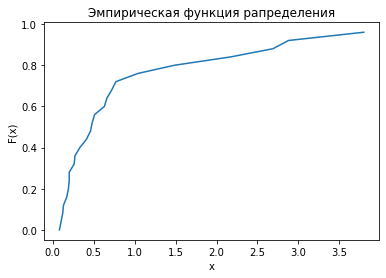

In [183]:
plt.title('Эмпирическая функция рапределения')
plt.ylabel('F(x)')
plt.xlabel('x')
plt.plot(np.sort(x), F(np.sort(x)))
plt.show()

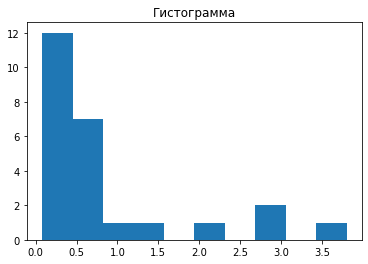

In [184]:
plt.title('Гистограмма')
plt.hist(x)
plt.show()

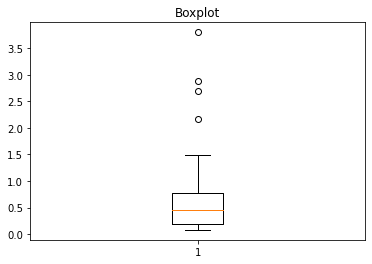

In [186]:
plt.title('Boxplot')
plt.boxplot(x)
plt.show()

## c)

In [293]:
def q(y):
    return 0.75*(1-y**2)

In [192]:
s = np.sqrt(1/(n-1)*np.sum((x - np.mean(x))**2))
h = 2.344*s/n**0.2

In [197]:
print('s = ', round(s, 2), '; h = ', round(h, 2))

s =  1.0 ; h =  1.23


In [155]:
def pdf_kernel(z):
    return 1/(n*h)*np.sum(q(z-x)/h)

In [169]:
pdf_kernel(x) #?

2943.028928234201

## d)

In [157]:
np.var(x)

0.95992384

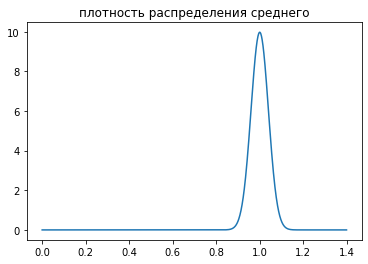

In [282]:
x1 = np.arange(0, 1.4, 0.001)
plt.title('плотность распределения среднего')
plt.plot(x1, scs.norm.pdf(x1, 1.0, 0.04))
plt.show()

In [280]:
means = []
for _ in range(1000):
    sample_mean = np.random.choice(x, size=n, replace=True)
    means.append(sample_mean.mean())

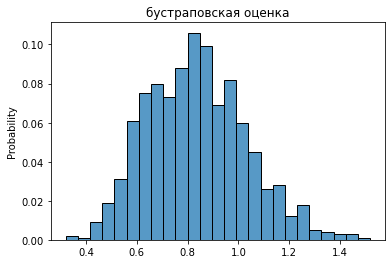

In [284]:
plt.title('бустраповская оценка')
seaborn.histplot(means, bins = n, stat="probability",common_norm=True)
plt.show()

## e)

In [254]:
koeff = []
for _ in range(1000):
    sample_koeff = np.random.choice(x, size=n, replace=True)
    koeff.append(scs.skew(sample_koeff))

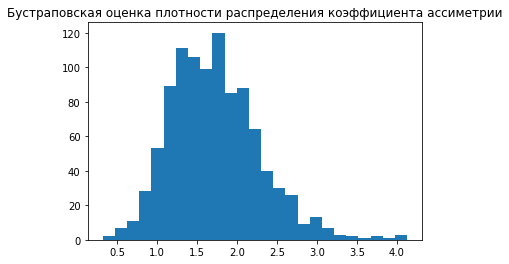

In [255]:
plt.title('Бустраповская оценка плотности распределения коэффициента ассиметрии')
plt.hist(koeff, n)
plt.show()

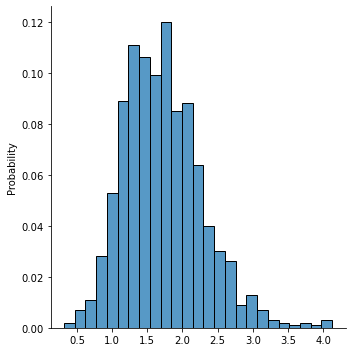

In [286]:
seaborn.displot(koeff, bins = n, stat="probability") # с нормальной вероятностью...